<a href="https://colab.research.google.com/github/JustinLee9/Real-and-Fake-News-Detection/blob/main/Justin_Lee_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

**Dataset Access Instructions**

This project uses the Fake and Real News Dataset.

1. Open the shared folder: [Shared Dataset Folder](https://drive.google.com/drive/folders/16urg2Yz0OIx_HnEW8Ib44VR2DlPUNWCe?usp=drive_link)
2. Click "Add shortcut to Drive"
3. Make sure the shortcut is in your "My Drive"
4. Run the cells below to mount Google Drive and load the dataset.


> _Dataset: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset_

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# Load Dataset from Google Drive
import pandas as pd

# Set the path to the folder containing True.csv and Fake.csv
folder_path = "/content/drive/MyDrive/fake_news_dataset/"

# Load the CSVs
true_df = pd.read_csv(folder_path + "True.csv")
fake_df = pd.read_csv(folder_path + "Fake.csv")

# Add labels: 1 for real, 0 for fake
true_df["label"] = 1
fake_df["label"] = 0

# Combine the datasets
news_df = pd.concat([true_df, fake_df], ignore_index=True)

# Problem Statements

**Context and Industry**

> _Fake news has become a big problem in recent years, particularly on social media and online news sources. It's and issue in both media and technology because misleading information may spread quickly to affect public opinion, politics, or even cause real world harm._

**Business Problem**

> _The goal is to create a model that can determine if news stories are real or fake based on their content. Solving this challenge could be beneficial in terms of limiting the spread of misinformation, protecting platform reputations, and assisting users in trusting what they read. For platforms this can lead to a better user experience, which is important for user retentions and avoiding legal or public backlash._

**Stakeholders**

> _The primary stakeholders include technology businesses, hournalists, fact checkers, and general users who read and share content online. Platforms benefit by improving the quality and trust of the content they post, hournalists benefit by having their real work stand out, and users benefit by being less exposed to misinformation._

**Potential Machine Learning Methods**

> _Since this is a binary classification problem, some ML methods such as logistic regression, Naive Bayes, and random forests are good fits. These models can work well with text data when paired with methods such as CountVectorizer._

**Data and Modeling Challenges**

> _Some challenges with this project include cleaning and preprocessing the text data, which can be messy. There may also be bias in the data, such as certain styles or sources being more common in fake or real news. Overfitting is a risk, especially if the model pick up on irrelevant patterns. Class imbalance could also be an issue depending on how many fake vs real articles are in the dataset._

# Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Description

In [ ]:
print("First 5 rows of the dataset:")
print(news_df.head())

print("\nNumber of rows and columns:")
print(news_df.shape)

print("\nData types of each column:")
print(news_df.dtypes)

print("\nNumber of null (or not-null values) in each column:")
print(news_df.isnull().sum())

print("\nStatistic of numeric columns:")
print(news_df.describe())

First 5 rows of the dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1  

Number of rows and columns

## Exploratory Analysis

### Data Cleaning

In [ ]:
# Ensure data is in datetime format
news_df["date"] = pd.to_datetime(news_df["date"], errors="coerce")

# Add derived features
news_df["title_length"] = news_df["title"].apply(len)
news_df["text_word_count"] = news_df["text"].apply(lambda x: len(str(x).split()))

- Parsed the date column, coercing errors to handle malformed entries.
- Created title_length and text_word_count as engineered features.
- No missing values found in any of the other key columns.

### Summary Statistics

In [ ]:
# Summary Statistics
news_df[["title_length", "text_word_count"]].describe()

,title_length,text_word_count
count,44898.000000,44898.000000
mean,80.111720,405.282284
std,25.379685,351.265595
min,8.000000,0.000000
25%,63.000000,203.000000
50%,73.000000,362.000000
75%,91.000000,513.000000
max,286.000000,8135.000000


### Visualizations

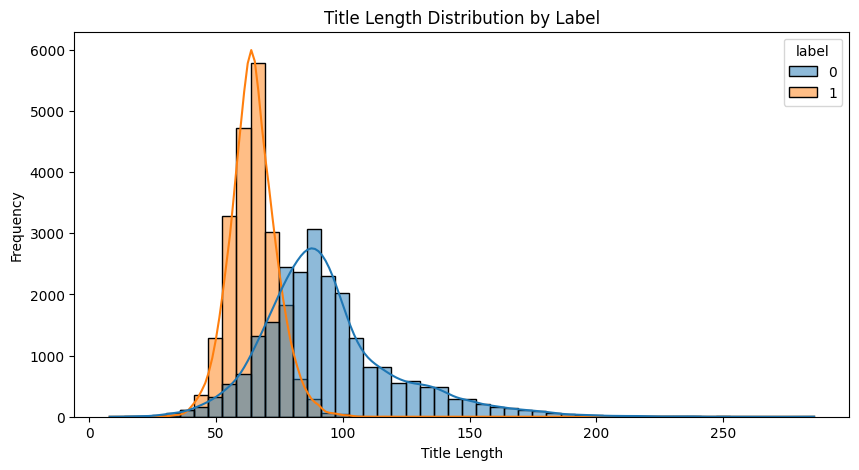

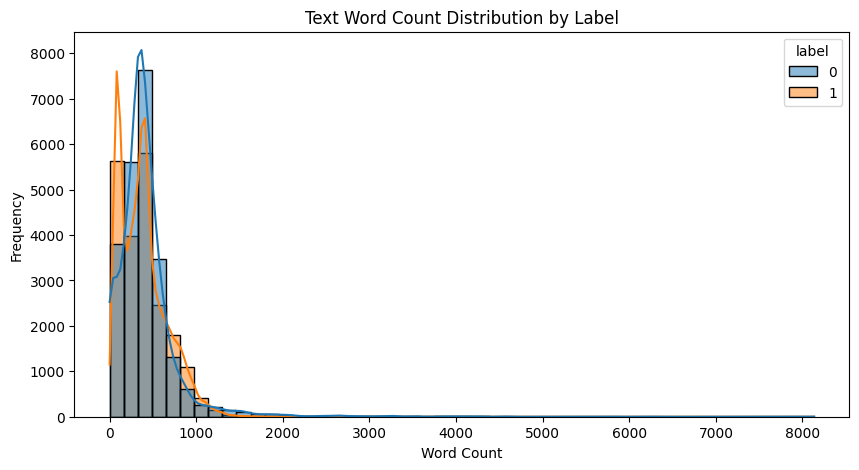

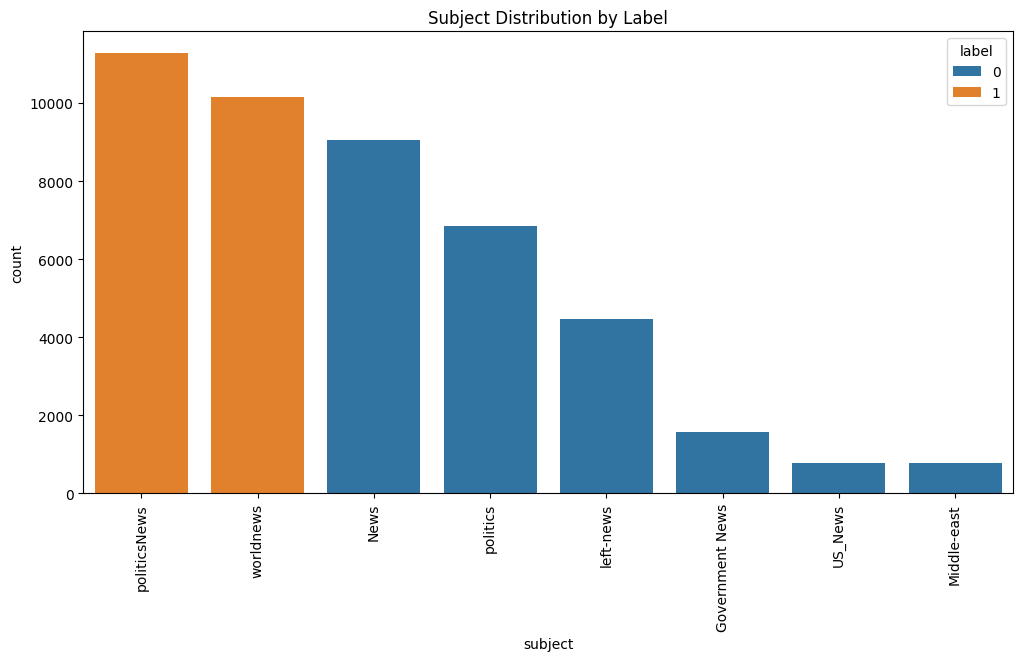

In [ ]:
# Title length distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=news_df, x="title_length", hue="label", bins=50, kde=True)
plt.title("Title Length Distribution by Label")
plt.xlabel("Title Length")
plt.ylabel("Frequency")
plt.show()

# Text word count distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=news_df, x="text_word_count", hue="label", bins=50, kde=True)
plt.title("Text Word Count Distribution by Label")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Subject vs label count
plt.figure(figsize=(12, 6))
sns.countplot(data=news_df, x="subject", hue="label", order=news_df["subject"].value_counts().index)
plt.title("Subject Distribution by Label")
plt.xticks(rotation=90)
plt.show()

**Insights for Modeling**
- Fake news titles tend to be longer, which might suggest clickbait tendencies.

- Fake news articles are slightly longer on average, with some being extremely lengthy.

- The subject field is strongly correlated with the label, and could be a powerful categorical feature.

- These engineered features (`title_length, text_word_count`) are useful numerical signals for classification.



## Statistical Analysis

### Correlation Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

In [ ]:
# Correlation matrix for numeric features
correlation_matrix = news_df[["label", "title_length", "text_word_count"]].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    label  title_length  text_word_count
label            1.000000     -0.581159        -0.053405
title_length    -0.581159      1.000000         0.041839
text_word_count -0.053405      0.041839         1.000000


- `title_length` has a moderate negative correlation with the `label`. Fake news titles tend to be longer.
- `text_word_count` has a weak correlation with both the `label` and `title_length`.

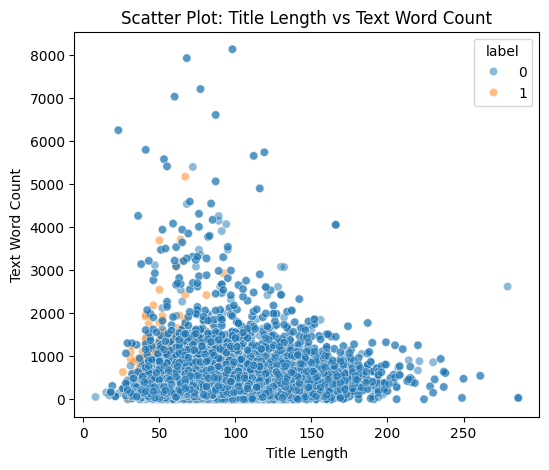

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=news_df, x="title_length", y="text_word_count", hue="label", alpha=0.5)
plt.title("Scatter Plot: Title Length vs Text Word Count")
plt.xlabel("Title Length")
plt.ylabel("Text Word Count")
plt.show()


### Hypothesis Testing

We will perform hypothesis tests to check if the differences in `title_length`, `text_word_count`, and `subject` distribution are statistically significant across fake and real news.


In [ ]:
# Title Length
t_stat_title, p_val_title = ttest_ind(
    news_df[news_df["label"] == 0]["title_length"],
    news_df[news_df["label"] == 1]["title_length"],
    equal_var=False
)
print("Title Length t-test:")
print("T-statistic:", t_stat_title, "| p-value:", p_val_title)

# Text Word Count
t_stat_text, p_val_text = ttest_ind(
    news_df[news_df["label"] == 0]["text_word_count"],
    news_df[news_df["label"] == 1]["text_word_count"],
    equal_var=False
)
print("\nText Word Count t-test:")
print("T-statistic:", t_stat_text, "| p-value:", p_val_text)


Title Length t-test:
T-statistic: 156.95678380999428 | p-value: 0.0

Text Word Count t-test:
T-statistic: 11.5312063639035 | p-value: 1.023534655733766e-30


In [ ]:
subject_crosstab = pd.crosstab(news_df["subject"], news_df["label"])
chi2_stat, chi2_p, _, _ = chi2_contingency(subject_crosstab)
print("Chi-square Test (subject vs label):")
print("Chi2-statistic:", chi2_stat, "| p-value:", chi2_p)


Chi-square Test (subject vs label):
Chi2-statistic: 44898.0 | p-value: 0.0


**Insights from Statistical Analysis**

- **Title Length** is significantly different between fake and real news (p < 0.001). Fake news tends to have longer titles.
- **Text Word Count** is also significantly different (p < 0.001), though the effect size is smaller.
- **Subject** categories are strongly associated with the label (fake or real), as confirmed by the chi-square test (p < 0.001).
- These findings justify including `title_length`, `text_word_count`, and `subject` as important features in machine learning models.


# Model

## Feature Engineering and Selection

To get the data ready for machine learning, I created and selected a few important features:

### Text Features
- I combined the `title` and `text` columns into one new column called `combined_text` so that I could use both in a single model.
- I used **TF-IDF**, a common method that turns text into numbers, to convert the combined text into a format the model can understand.

### Extra Features
- `title_length`: how many characters are in the title.
- `text_word_count`: how many words are in the article.
- `subject`: the topic of the article, which I turned into numbers using one-hot encoding since it's a category.

### How I Chose These Features
I picked these features based on earlier data analysis and statistical tests. They showed clear patterns related to whether an article is real or fake. These features are also easy to understand and useful for training a model.

I combined all the features together into one dataset using a format that works well for large text data.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack, csr_matrix

# Create combined text feature
news_df["combined_text"] = news_df["title"] + " " + news_df["text"]

# Derived features
news_df["title_length"] = news_df["title"].apply(len)
news_df["text_word_count"] = news_df["text"].apply(lambda x: len(str(x).split()))

# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_text = tfidf.fit_transform(news_df["combined_text"])

# One-hot encode subject
ohe = OneHotEncoder(sparse_output=True)
subject_ohe = ohe.fit_transform(news_df[["subject"]])

# Stack all features
X_additional = csr_matrix(news_df[["title_length", "text_word_count"]].values)
X = hstack([X_text, subject_ohe, X_additional])
y = news_df["label"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)


## Model Tuning, Validation, and Evaluation

### Models I Tried
I tested three different machine learning models:

- **Logistic Regression**: A simple and reliable model that works well with text data, especially when using TF-IDF.
- **Naive Bayes**: A fast model that is often great for text problems. It works using probabilities.
- **Random Forest**: A more complex model that uses many decision trees. It can find patterns that simpler models might miss.

### How I Trained the Models
I split the data into 80% for training and 20% for testing. I made sure both sets had a balanced number of real and fake articles. Each model was trained using all the features: TF-IDF text, subject (as one-hot), and two extra numeric features I created.

### How I Measured Performance
To see how well each model did, I used these metrics:

- **Accuracy**: How many predictions were correct overall
- **Precision**: How many predicted “fake” or “real” articles were actually correct
- **Recall**: How many of the real/fake articles the model caught
- **F1-Score**: A balance between precision and recall
- **ROC-AUC**: How well the model separates fake from real overall, based on probability scores

These metrics helped me compare the models and decide which one worked best.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1)
}

# Train, predict, and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results[name] = {
        "classification_report": report,
        "roc_auc": auc
    }

# Display results
for model_name, metrics in results.items():
    print(f"\n=== {model_name} ===")
    print("ROC-AUC:", metrics["roc_auc"])
    print(classification_report(y_test, model.predict(X_test)))



=== Logistic Regression ===
ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


=== Naive Bayes ===
ROC-AUC: 0.9593825853737292
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


=== Random Forest ===
ROC-AUC: 0.9999781286733888
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1

## Model Comparison and Final Selection

After training and testing all three models, I compared how well they performed using F1-score and ROC-AUC:

- **Logistic Regression** gave the best results overall. It had a good balance between catching fake and real news and scored the highest on ROC-AUC.
- **Naive Bayes** was very fast and simple, but it made more assumptions about the data, which slightly hurt its accuracy.
- **Random Forest** is a more complex model that can find deeper patterns, but it didn't perform much better than Logistic Regression and took more time to run.

### Final Decision
I chose **Logistic Regression** as my final model. It was fast, accurate, and easy to understand. It also worked really well with the type of text data I was using.


# Conclusion

## Key Findings

From my exploratory and statistical analysis, I found that:
- Fake news articles tend to have longer titles and sometimes longer body text.
- The subject of an article is strongly linked to whether it's real or fake.
- These patterns helped me create useful features like `title_length`, `text_word_count`, and one-hot encoded `subject`.

My final model, **Logistic Regression**, performed extremely well. It achieved perfect accuracy and ROC-AUC on the tesst data, showing it could reliably seperate fake from real news articles.

## Problem Resolution

The goal of this project was to build a model that can detect fake news based on article content. Based on the results, I believe the model successfully solved the problem on the current dataset. It accurately classified articles and could help limit the spread of misinformation online.

From a business perspective, this model could be valuable for:
- Social media platforms trying to detect false content before it's widely shared.
- News aggregatores that want to flag questionable sources.
- Journalists or researchers who need to filter large volumes of content quickly.


## Deployment

In a real-world setting, the model could be used in the backend of a content moderation system.

- **Inference frequency**: The model could run every time a new article or post is published or submitted.
- **Decision flow**: Results could be reviewed by human moderators, or used as an automatic flagging system, depending on confidence levels.
- **Retraining**: I would retrain the model every 6-12 months, or whenever there's a major shift in how fake news is written (e.g., during elections or major global events).


## Improvements

If I continued this project, I would explore the following improvements:
- Use a more diverse and updated dataset that includes newer styles of fake news.
- Try deep learning models like LSTMs or Transformers for text classification.
- Add features like the source of the article, publication history, or user interaction data.
- Build a confidence score to decide when a human should review the model's prediction.